# EAD - Análise Exploratória de Dados
### Pós Graduação em Inteligência Artificial e Aprendizado de Máquina / PUC MINAS

Professor Leandro Figueira Lessa

`Felipe Bochoski da Cruz` - `1633227@sga.pucminas.br`

`Khalil Omar Salha` - `1632515@sga.pucminas.br`

`Pedro Augusto de Morais` - `1633121@sga.pucminas.br`

`Tuerê Pinto` - `1453566@sga.pucminas.br`

`2025`

# 1. Introdução

Este projeto  tem como objetivo realizar no mínimo 15 análises de dados, utilizando
visualizações, tabelas e representações gráficas para investigar o desenvolvimento humano
e econômico ao redor do mundo. As análises devem ser feitas com base no dataset
Gapminder, que contempla dados históricos, cujo objetivo é obter uma visão abrangente sobre padrões globais de crescimento, desigualdade, evolução populacional e qualidade de vida de países ao redor do mundo.

Ele será realizado em 5 etapas:
    1. Introdução
    2. Coleta e Exploração de Dados
    3. Limpeza dos Dados
    4. Funções de Visualização e Análise Gráfica
    5. Conclusão



# 2. Coleta e Exploração de Dados
Os dados utilizados neste projeto são provenientes do Gapminder, uma organização sem fins lucrativos que disponibiliza dados estatísticos sobre desenvolvimento global. O dataset inclui informações sobre expectativa de vida, PIB per capita e população de diversos países ao longo do tempo.

### Importação das bibliotecas necessárias no projeto

In [8]:
import sys
sys.path.append('../')
from src.datasets_reader import read_gapminder_data
from src.matplot_samples import plot_line_chart , scatter_subplots, plot_scatter_chart
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = read_gapminder_data()

Arquivo ../datasets/gapminder_full.csv lido com sucesso.


### Exibe os dados contidos no arquivo CSV


In [3]:
df.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


# 3. Limpeza dos Dados

Prepararando os dados, tratando inconsistências e identificando padrões iniciais

In [4]:
# Analisar os dados duplicados
num_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {num_duplicados}")

Total de linhas duplicadas: 32


In [5]:
# Visualizar os dados que estão duplicados
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

         country  year         pop continent  lifeExp     gdpPercap
9    Afghanistan  1997  22227415.0      Asia   41.763    635.341351
72   Afghanistan  1997  22227415.0      Asia   41.763    635.341351
120      Belgium  2007  10392226.0    Europe   79.441  33692.605080
140      Bolivia  1987   6156369.0  Americas   57.251   2753.691490
141      Bolivia  1992   6893451.0  Americas   59.957   2961.699694
..           ...   ...         ...       ...      ...           ...
644       Guinea  1952   2664249.0    Africa   33.609    510.196492
645       Guinea  1957   2876726.0    Africa   34.558    576.267025
646       Guinea  1962   3140003.0    Africa   35.753    686.373674
647       Guinea  1967   3451418.0    Africa   37.197    708.759541
648       Guinea  1972   3811387.0    Africa   38.842    741.666231

[64 rows x 6 columns]


In [3]:
print(f"Quandidade de registros antes da remoção de duplicados e valores nulos: {len(df)}");
df = df.drop_duplicates() #remove registros duplicados
df = df.dropna() #remove registros com valores nulos
print(f"Quandidade de registros depois da remoção de duplicados e valores nulos: {len(df)}");

Quandidade de registros antes da remoção de duplicados e valores nulos: 1736
Quandidade de registros depois da remoção de duplicados e valores nulos: 1704


# 4. Funções de Visualização e Análise Gráfica

Esta seção utiliza funções de visualização e análise gráfica do dataset Gapminder para interpretar indicadores como expectativa de vida, PIB per capita e população, permitindo compreender padrões, relações e desigualdades no desenvolvimento humano e econômico global.

##### Plotagem do Gráfico: Produto Interno Bruto Per Capita vs Expectativa de Vida Por Continente

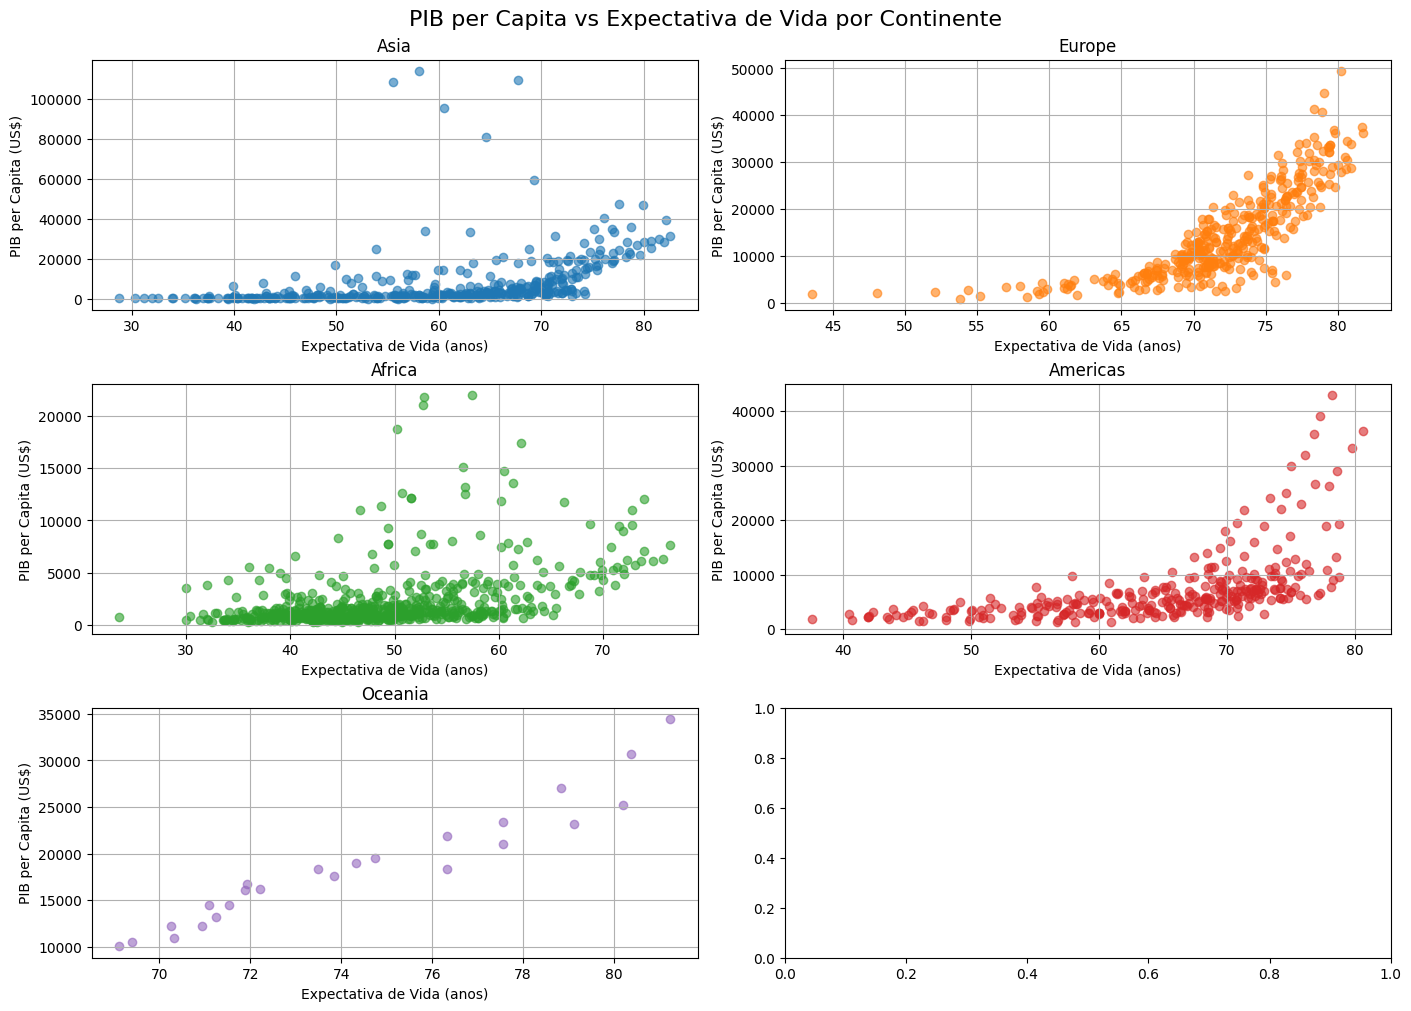

In [11]:
continentsList = df['continent'].unique().tolist()
nRows = len(continentsList) - (len(continentsList) // 2 ) 

scatter_subplots(df, 
                'continent', 
                dfXColFieldName='lifeExp', 
                dfYColFieldName='gdpPercap',
                nRows=nRows, 
                nCols=2, 
                dataToAnalyze=continentsList, 
                xLabel='Expectativa de Vida (anos)', 
                yLabel='PIB per Capita (US$)',
                titulo_geral="PIB per Capita vs Expectativa de Vida por Continente",
                )

<p align="left">
  <b>Análise do Gráfico: PIB per Capita vs Expectativa de Vida por Continente</b>
</p>

<p align="left">
<b>[Visão Geral]</b>

</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os gráficos de gradunalidade apresentados acima apresentam um aumento da expectativa de vida conforme o Produto Interno Bruto Per Capita cresce. Os continentes com países mais ricos, tendem a ter pessoas com idades mais avançadas.</p>

<p>
<p align="left"><b>[Analise Entre Continentes]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Asia:</b> Há grande dispersão nos dados apresentados, indicando grandes diferenças economicas e támbem sociais no continente. Pode-se observar que o aumento do PIB Per Capita está associado ao aumento da expectativa de vida entre paises.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa:</b> Apresenta maior concentração de pontos, indicando menor desigualdade entre paises. A expectitiva de vida é forte e estável (65 - 80 anos), demostrando que quase toda as nações apresentam alta renda e longevidade.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Africa:</b>  O continente apresenta uma disparidade muito maior de riquezas entre paises e consequentemente a expectativa de vida. Mesmo paises com maior PIB, a expectativa de vida é menor do que os demais continentes.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>América:</b> Possui uma tendência de crescimento semelhante a Europa, mas com maior variação. Há um disparidade muito grande de renda entre paises e consequentemente a expectativa de vida.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Oceania:</b> Embora poucos pontos de comparação, o continente apresenta valores elevados do PIB e expectativa de vida com relação aos demais continentes; além de possuir um crescimento continuo que pode apresentar um alto padrão de desenvolvimento e desigualdade.</p>
</p>

<b>[Conclusão]</b>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os gráficos apresentam um padrão global consistente: quanto maior o PIB Per Capita, maior é a expectativa de vida.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Podemos concluir que a Europa e Oceania exibem rendas mais altas e expectativa de vida mais estáveis; a América e Ásia apresentam um crescimento mesmo com maior variação interna e a África com menor indice Per Capita do mundo, mas ainda sim, demostrando uma tendência positiva. Em resumo: o desenvolvimento economico está diretamente ligado à qualidade de vida, mas cada continente evolui com seus niveis de desigualdade próprios.</p>


<br>

##### Plotagem do Gráfico: Média da Expectativa de Vida Por Continente


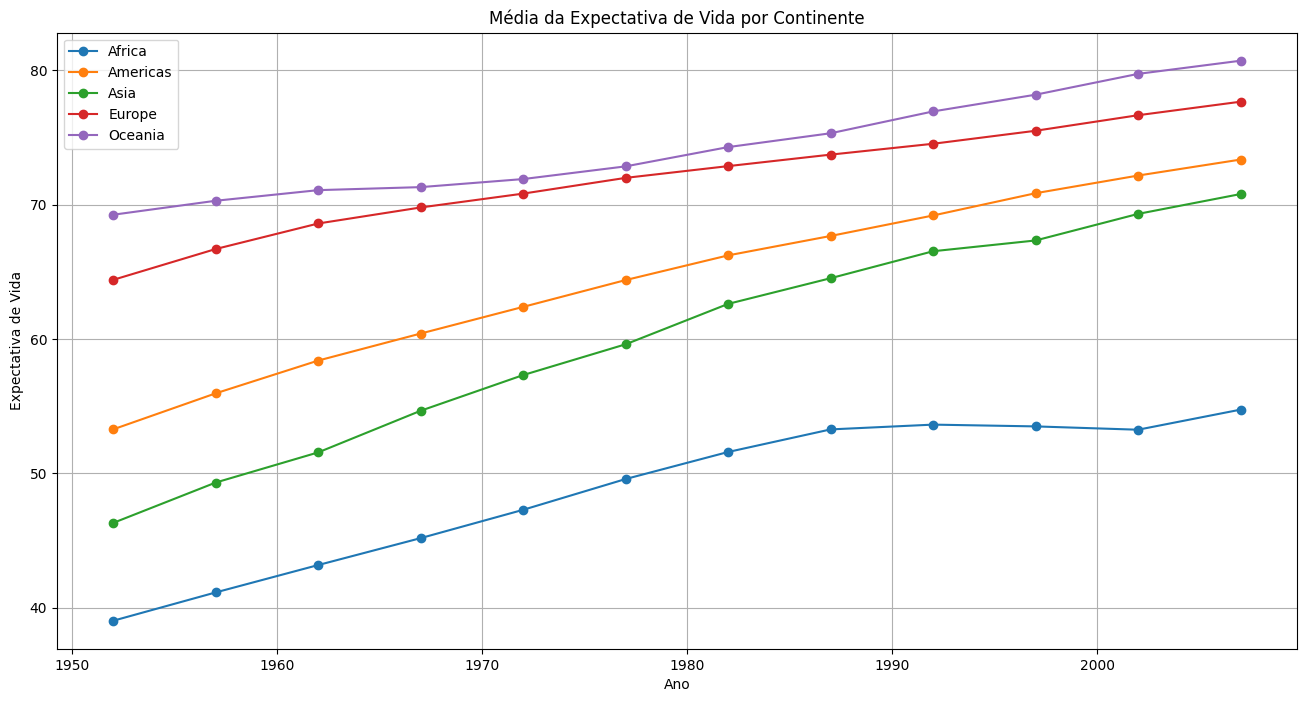

In [10]:
group = df.groupby(['year', 'continent'])['lifeExp'].mean().unstack()


plot_line_chart(group=group, 
                title = "Média da Expectativa de Vida por Continente", 
                xLabel = "Ano", 
                yLabel = "Expectativa de Vida",
                showGrid = True,
                marker='o',
                xSize=16,
                ySize=8
                )


<p align="left">
  <b>Análise do Gráfico: Média da Expectativa de Vida Por Continente</b>
</p>
<p align="left">
<b>[Visão Geral]</b>

</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Este gráfico apresenta a média da expectativa de vida ao longo dos anos por divisoes continentais.</p>
</p>

<b>[Conclusão]</b>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Conforme a análise extraida anteriormente dos gráficos "PIB per Capita vs Expectativa de Vida por Continente", podemos chegar a mesma conclusão: os continentes idependentemente do seu desenvolvimento econômico e discrepâncias de renda entre paises, estão apresentando aumento na expectativa de vida de suas populações; tendo Oceania como continente com maior e Africa com menor indice de expectativa de vida </p>